#### 1. Import pandas library

In [1]:
import pandas as pd

#### 2. Import users table:

In [2]:
data_users = pd.read_csv('users_table.csv')
print(data_users.head())

   Id  Reputation         CreationDate   DisplayName       LastAccessDate  \
0  -1           1  2010-07-19 06:55:26     Community  2010-07-19 06:55:26   
1   2         101  2010-07-19 14:01:36  Geoff Dalgas  2013-11-12 22:07:23   
2   3         101  2010-07-19 15:34:50  Jarrod Dixon  2014-08-08 06:42:58   
3   4         101  2010-07-19 19:03:27        Emmett  2014-01-02 09:31:02   
4   5        6792  2010-07-19 19:03:57         Shane  2014-08-13 00:23:47   

                       WebsiteUrl            Location  \
0  http://meta.stackexchange.com/  on the server farm   
1        http://stackoverflow.com       Corvallis, OR   
2        http://stackoverflow.com        New York, NY   
3    http://minesweeperonline.com   San Francisco, CA   
4         http://www.statalgo.com        New York, NY   

                                             AboutMe  Views  UpVotes  \
0  <p>Hi, I'm not really a person.</p>\n\n<p>I'm ...      0     5007   
1  <p>Developer on the StackOverflow team.  Find .

#### 3. Rename Id column to userId

In [3]:
data_users = data_users.rename(columns = {"Id" : "userId"})

#### 4. Import posts table:

In [4]:
data_posts = pd.read_csv("posts_table.csv")
print (data_posts.head())

   Id  PostTypeId  AcceptedAnswerId          CreaionDate  Score  ViewCount  \
0   1           1              15.0  2010-07-19 19:12:12     23     1278.0   
1   2           1              59.0  2010-07-19 19:12:57     22     8198.0   
2   3           1               5.0  2010-07-19 19:13:28     54     3613.0   
3   4           1             135.0  2010-07-19 19:13:31     13     5224.0   
4   5           2               NaN  2010-07-19 19:14:43     81        NaN   

                                                Body  OwnerUserId  \
0  <p>How should I elicit prior distributions fro...          8.0   
1  <p>In many different statistical methods there...         24.0   
2  <p>What are some valuable Statistical Analysis...         18.0   
3  <p>I have two groups of data.  Each with a dif...         23.0   
4  <p>The R-project</p>\n\n<p><a href="http://www...         23.0   

       LasActivityDate                                              Title  \
0  2010-09-15 21:08:26                 

#### 5. Rename Id column to postId and OwnerUserId to userId

In [5]:
data_posts = data_posts.rename(columns = {"Id" : "postId", "OwnerUserId" : "userId"})

#### 6. Define new dataframes for users and posts with the following selected columns:
    **users columns**: userId, Reputation,Views,UpVotes,DownVotes
    **posts columns**: postId, Score,userId,ViewCount,CommentCount

In [6]:
users = data_users[["userId", "Reputation", "Views", "UpVotes", "DownVotes"]]
posts = data_posts[["postId", "Score", "userId", "ViewCount", "CommentCount"]]

#### 7. Merge both dataframes, users and posts. 
You will need to make a [merge](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html) of posts and users dataframes.

In [7]:
users_posts = users.merge(posts)
print (users_posts.head())

   userId  Reputation  Views  UpVotes  DownVotes  postId  Score  ViewCount  \
0      -1           1      0     5007       1920    2175      0        NaN   
1      -1           1      0     5007       1920    8576      0        NaN   
2      -1           1      0     5007       1920    8578      0        NaN   
3      -1           1      0     5007       1920    8981      0        NaN   
4      -1           1      0     5007       1920    8982      0        NaN   

   CommentCount  
0             0  
1             0  
2             0  
3             0  
4             0  


#### 8. How many missing values do you have in your merged dataframe? On which columns?

In [8]:
users_posts.isnull().sum()
# There are 23572 missing values on ViewCount column.

userId              0
Reputation          0
Views               0
UpVotes             0
DownVotes           0
postId              0
Score               0
ViewCount       23572
CommentCount        0
dtype: int64

#### 9. You will need to make something with missing values.  Will you clean or filling them? Explain. 
**Remember** to check the results of your code before passing to the next step

In [9]:
users_posts[["Views", "Score", "ViewCount", "CommentCount"]]

users_posts[users_posts.ViewCount.isnull()]

filtered = users_posts[(users_posts["ViewCount"].isnull()) & (users_posts["Views"]==0)].count()
filtered.head(50)

#1. users_posts[['ViewCount']] = users_posts[['ViewCount']].fillna(0) 
# I've decided to fill all the missing values with 0, because I could not find any relation between
#the null values of ViewCount and the others.
#2. AFTER doing the outliers, I've decided to check the histogram of some columns from users_posts. 
#So, I deleted all rows with null values.
#Then, it looks better the data, even though I've to delete 23572 rows. There was an incredible amount of 0
#in all the other columns. Now there are many still, but not that much. Seems that there were many fake posts, or
#the counter was not working properly.
users_posts = users_posts.dropna()
users_posts


,userId,Reputation,Views,UpVotes,DownVotes,postId,Score,ViewCount,CommentCount
123,5,6792,1145,662,5,6,152,29229.0,5
131,5,6792,1145,662,5,103,28,1990.0,6
133,5,6792,1145,662,5,125,75,29261.0,2
145,5,6792,1145,662,5,423,156,64481.0,7
150,5,6792,1145,662,5,562,10,1005.0,1
...,...,...,...,...,...,...,...,...,...
38956,44995,11,9,0,0,44474,1,446.0,1
38957,45934,11,1,0,0,34003,1,115.0,2
38958,46192,36,1,0,0,40667,5,326.0,2
38959,46522,235,13,27,1,17461,3,166.0,0


#### 10. Adjust the data types in order to avoid future issues. Which ones should be changed? 

In [10]:
users_posts[["userId", "postId"]] = users_posts[["userId", "postId"]].astype('object')
users_posts["userId"].dtype
users_posts[["ViewCount"]] = users_posts[["ViewCount"]].astype('int64')

In [11]:
stats = users_posts.describe().transpose()
stats.head()

,count,mean,std,min,25%,50%,75%,max
Reputation,15390.0,866.745874,3160.304354,1.0,36.0,148.0,477.0,87393.0
Views,15390.0,152.623522,644.478541,0.0,4.0,18.0,73.0,20932.0
UpVotes,15390.0,105.275179,507.474920,0.0,0.0,5.0,37.0,11442.0
DownVotes,15390.0,3.204029,21.851984,0.0,0.0,0.0,0.0,779.0
Score,15390.0,4.150032,6.839064,-13.0,1.0,3.0,5.0,192.0


In [12]:
stats['IQR'] = stats['75%'] - stats['25%']
stats

,count,mean,std,min,25%,50%,75%,max,IQR
Reputation,15390.0,866.745874,3160.304354,1.0,36.0,148.0,477.0,87393.0,441.0
Views,15390.0,152.623522,644.478541,0.0,4.0,18.0,73.0,20932.0,69.0
UpVotes,15390.0,105.275179,507.474920,0.0,0.0,5.0,37.0,11442.0,37.0
DownVotes,15390.0,3.204029,21.851984,0.0,0.0,0.0,0.0,779.0,0.0
Score,15390.0,4.150032,6.839064,-13.0,1.0,3.0,5.0,192.0,4.0
ViewCount,15390.0,1196.225991,3742.952815,14.0,173.0,385.0,967.0,175495.0,794.0
CommentCount,15390.0,2.322287,2.764284,0.0,0.0,2.0,4.0,29.0,4.0


In [13]:
outliers = pd.DataFrame(columns=users_posts.columns)
 
for col in stats.index:
    iqr = stats.at[col,'IQR']
    cutoff = iqr * 1.5
    lower = stats.at[col,'25%'] - cutoff
    upper = stats.at[col,'75%'] + cutoff
    results = users_posts[(users_posts[col] < lower) | 
                   (users_posts[col] > upper)].copy()
    results['Outlier'] = col
    outliers = outliers.append(results)

outliers

,userId,Reputation,Views,UpVotes,DownVotes,postId,Score,ViewCount,CommentCount,Outlier
123,5,6792,1145,662,5,6,152,29229,5,Reputation
131,5,6792,1145,662,5,103,28,1990,6,Reputation
133,5,6792,1145,662,5,125,75,29261,2,Reputation
145,5,6792,1145,662,5,423,156,64481,7,Reputation
150,5,6792,1145,662,5,562,10,1005,1,Reputation
...,...,...,...,...,...,...,...,...,...,...
38593,18482,30,8,3,0,47284,0,265,11,CommentCount
38596,18492,178,11,2,0,47299,2,537,14,CommentCount
38621,18531,70,9,1,0,47750,0,87,11,CommentCount
38625,18546,31,32,0,0,47444,0,628,11,CommentCount


In [14]:
outliers.to_csv("outliers_users_posts.csv",sep="\t",)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd78ec8df40>]],
      dtype=object)

<Figure size 1008x504 with 0 Axes>

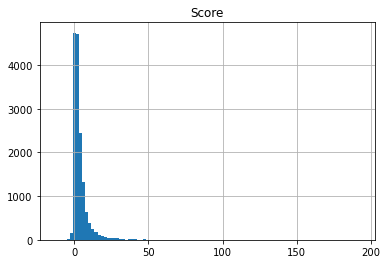

In [19]:
from matplotlib import pyplot as plt
plt.figure(figsize=(14,7))
users_posts[['Score']].hist(bins=100)  

In [20]:
iqrrep = stats.at['Score','IQR']
cutoff = iqrrep * 1.5
lowerrep = stats.at['Score','25%'] - cutoff
upperrep = stats.at['Score','75%'] + cutoff
print(cutoff)
print(lowerrep)
print(upperrep)

6.0
-5.0
11.0
